# This notebook contains some basic code to explore whether a building can be categorized by its name.

In [1]:
%pip install -q pandas spacy wordcloud matplotlib
!python -m spacy download en_core_web_sm

#Makes paths work if you just clone or pull the repo
import os
os.chdir('../')
os.getcwd()

Note: you may need to restart the kernel to use updated packages.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


'/Volumes/T7/DATA422_Fall2024_Team5'

In [2]:
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm")

df = pd.read_csv("Data/Seattle_Building_Data_Cleaned.csv")

categories = {
    'Education': ['university', 'sps', 'district', 'campus', 'school', 'college', 'academy', 'center', 'institute'],
    'Library': ['library'],
    'Business': ['business', 'commerce'],
    'Sports': ['gym', 'stadium'],
    'Arts': ['arts', 'theater'],
    'Housing': ['housing', 'apartment', 'condominium', 'court']
}

def categorize_building(name):
    doc = nlp(name.lower())
    for token in doc:
        token_text = token.text.lower()
        for category, keywords in categories.items():
            if token_text in keywords:
                return category
    return 'Other'

df['Category'] = df['BuildingName'].apply(categorize_building)

# Display the DataFrame
print(df)

      OSEBuildingID  DataYear  \
0                 1      2022   
1                 2      2022   
2                 3      2022   
3                 5      2022   
4                 8      2022   
...             ...       ...   
3648          50877      2022   
3649          50879      2022   
3650          50881      2022   
3651          50886      2022   
3652          50893      2022   

                                         BuildingName          BuildingType  \
0                                MAYFLOWER PARK HOTEL        NonResidential   
1                                     PARAMOUNT HOTEL        NonResidential   
2                      WESTIN HOTEL (Parent Building)        NonResidential   
3                                           HOTEL MAX        NonResidential   
4                               WARWICK SEATTLE HOTEL        NonResidential   
...                                               ...                   ...   
3648  BOEING Primary Standards Metrology (BLDG 15-

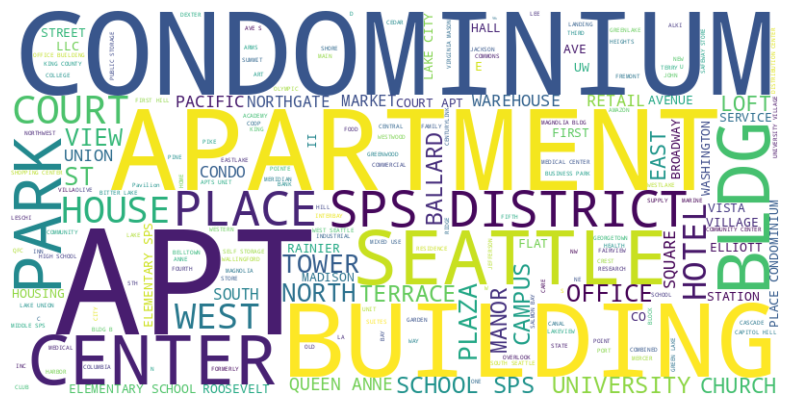

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Concatenate all building names into a single string
text = ' '.join(df['BuildingName'].tolist())

#Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()